<a href="https://colab.research.google.com/github/cassidyperry/IgniteHer/blob/main/IgniteHerFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to Python Coding Bootcamp!** 🐍
## The Scenario
### You own a house that is equipped with a solar battery. A solar battery is used as a backup battery if the power goes out. An intense storm has hit your area, causing the power to go out for at least 3 days, meaning you need to rely on your solar powered battery to power your essential items. 


---


## Our Goal
### Today's goal is to determine how long you can power your home with solar battery storage if you use your "essential" applicances throughout the outage. This depends on three main things:


1.   Battery storage capacity
2.   Output of the system that turns solar rays into power
3. Electricity needs during an outage

---


### In the code below, we define our battery size. This can easily be changed but it typically around 13 kWh. We have also listed some common appliances and their power requirement, W.

In [147]:
# Battery Capacity Definition
batterysize_Wh = 13500 # Wh

# List of Common Appliances
# appliances = ['Bulb', 'Fridge', 'Washing Machine', 'Microwave', 'TV', 'Wifi', 'Phone Charger']
# appliances_power_W = [100, 400, 850, 1000, 100, 20, 5]

class home_appliance():
    
    def __init__(self):
        
        self.power_demand = None # Watts  
        self.quantity = None
        self.runtime = None # h
            
fridge = home_appliance()
stove = home_appliance()
phone_charger = home_appliance()
TV = home_appliance()
bulb = home_appliance()
wifi = home_appliance()
microwave = home_appliance()

## Sunny Days in Major Cities 🌞
### Different cities experience different amounts of sunny days per month, depending on the time of year. 
### Information on the average amount of sunny hours per day can be found here: https://www.livingin-canada.com/sunshine-hours-canada.html
### First off, this data can be used to compare the amount of sunny hours per day that are experienced by each city in a month. Here, we are going to plot this information for each city by month. Below is the information needed that was gathered from the above website.

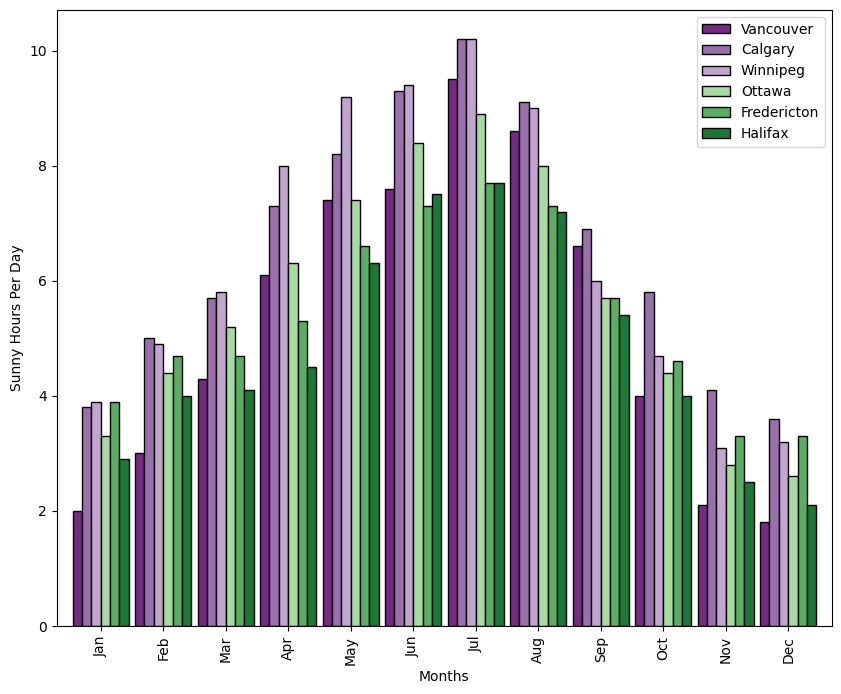

In [170]:
# Importing Library
import pandas as pd 
import matplotlib.pyplot as plot

# List of the Cities and Months
city = ['Vancouver','Calgary','Winnipeg','Ottawa','Fredericton','Halifax']
months_string = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Making a data definition
data=[['Jan',2.0, 3.8, 3.9, 3.3, 3.9, 2.9],
      ['Feb',3.0, 5.0, 4.9, 4.4, 4.7, 4.0],
      ['Mar',4.3, 5.7, 5.8, 5.2, 4.7, 4.1],
      ['Apr',6.1, 7.3, 8.0, 6.3, 5.3, 4.5],
      ['May', 7.4, 8.2, 9.2, 7.4, 6.6, 6.3],
      ['Jun', 7.6, 9.3, 9.4, 8.4, 7.3, 7.5],
      ['Jul', 9.5, 10.2, 10.2, 8.9, 7.7, 7.7],
      ['Aug', 8.6, 9.1, 9.0, 8.0, 7.3, 7.2],
      ['Sep', 6.6, 6.9, 6.0, 5.7, 5.7, 5.4],
      ['Oct', 4.0, 5.8, 4.7, 4.4, 4.6, 4.0],
      ['Nov', 2.1, 4.1, 3.1, 2.8, 3.3, 2.5],
      ['Dec', 1.8, 3.6, 3.2, 2.6, 3.3, 2.1]
     ]

# Plot multiple columns of the bar chart
colrs = ['#762a83', '#9970ab', '#c2a5cf', '#a6dba0', '#5aae61', '#1b7837']
df = pd.DataFrame(data, columns=['Months', 'Vancouver','Calgary','Winnipeg','Ottawa','Fredericton','Halifax'])
df.plot(x='Months', y=['Vancouver','Calgary','Winnipeg','Ottawa','Fredericton','Halifax'], kind="bar", width = 0.9, color = colrs, edgecolor = 'white', figsize=(10,8))
plot.ylabel('Sunny Hours Per Day')

# Display the plot
plot.show()

## Onto the Coding!
### Now that we have some of the basics down, we can determine the amount of charge our battery has depending on the amount of sunny days our city experiences. We will assume that our battery is completely drained of charge at the beginning of the month, and that it is not a leap year. The next section of code will assign you a city, the month and the number of days into the month have passed before the outage occurs.

In [149]:
# Importing Library
import random as rd

# Randomly choosing a city
your_city = rd.choice(city)
print('Your house is located in',your_city)

# Randomly choosing a month
month = rd.choice(months_string)
print('Your month is', month)

# Randomly choosing a day for the outage to occur and making sure that it is an actual day that happens in that month
date = rd.randint(1,31)
if month == 'February':
  date >= 28
elif (month == 'April' or 'June' or 'September' or 'November'):
  date >= 30
print('The number of days elapsed in the month is', date)

Your house is located in Halifax
Your month is September
The number of days elapsed in the month is 25


### Using the above plot of the sunny hours, find the average amount of hours of sun your city gets in the month generated. Input this number in the avg_sun variable below. 

In [150]:
avg_sun = 4.1 # hours of sun per day

### Now you need to decide which appliances are essential to you. Fill these appliances into the variable below, all_appliances. Then fill in the power requirement for these appliances in the following variable, all_appliances_power.

In [151]:
all_appliances = [phone_charger, TV, wifi, microwave]
all_appliance_power = [5, 20, 100, 1000]

for appliance, power in zip(all_appliances, all_appliance_power):
    appliance.quantity = 1
    if appliance == bulb:
        appliance.quantity = 20
    appliance.power_demand = power * appliance.quantity

total_power_W = []
for appliance in all_appliances:
    total_power_W.append(appliance.power_demand)

total_power_W = sum(total_power_W)

### If we assume that we will be using the appliances continuously during the outage, we can calculate the amount of hours we can power our essential appliances for.

In [152]:
hours_emerg_power = round(batterysize_Wh / total_power_W, 1)
print ('The total power the essential appliances use is', total_power_W, 'Watts and the number of hours these appliances can be powered for is', hours_emerg_power)

The total power the essential appliances use is 1125 Watts and the number of hours these appliances can be powered for is 12.0


### The last piece of the puzzle is how much of a charge we can actually achieve on our battery, depending on the information we randomly generated earlier. The last information we need is some information about our solar panels.

In [153]:
charge = batterysize_Wh*avg_sun*date*0.75 # Wh
if charge >= 13500:
  print('In this amount of sunny hours, the battery would be fully charged at 13,500 Watt Hours. We require a total of',total_power_W, 'Watts to run our essential appliances for', hours_emerg_power,'hours.')
else:
  print('The amount of charge gained is', charge,'Watt Hours. We require a total of',total_power_W, 'Watts to run our essential appliances for', hours_emerg_power,'hours.')

In this amount of sunny hours, the battery would be fully charged at 13,500 Watt Hours. We require a total of 1125 Watts to run our essential appliances for 12.0 hours.
